In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier

In [3]:
df = pd.read_csv("data/titanic.csv", index_col="PassengerId")
df.drop(columns=["Name", "Ticket", "Cabin"], inplace=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S


# Exploratory Data Analysis (EDA)

# yang perlu dianalisis ketika EDA

#Target
#numeric vs target
#categoric (ordinal) vs target

### Target

In [4]:
df.Survived.value_counts() #Kita mencari dan menganlisis informasi dari data target, disini kita mendapatkan informasi yg tidak selamat lebih banyak 

0    549
1    342
Name: Survived, dtype: int64

### Numeric vs Target

C:\Users\ACER\anaconda3\envs\jcopdl\lib\site-packages\statsmodels\nonparametric\kde.py:547: RuntimeWarning: invalid value encountered in greater
  x = x[np.logical_and(x > clip[0], x < clip[1])]
C:\Users\ACER\anaconda3\envs\jcopdl\lib\site-packages\statsmodels\nonparametric\kde.py:547: RuntimeWarning: invalid value encountered in less
  x = x[np.logical_and(x > clip[0], x < clip[1])]


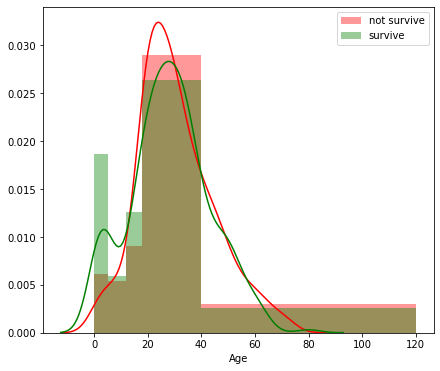

In [5]:
#Menganalisa umur vs survived(target),untuk melihat yang selamat itu umurnya seperti apasih dan yg ga selamat umurnya seperti apa pula
plt.figure(figsize=(7, 6))
sns.distplot(df.Age[df.Survived == 0], bins=[0, 5, 12, 18, 40, 120], color="r", label="not survive") #disini kita melihat membandingkan umur dengan target, bins adalah jarak antar umur dari balita hingga lansia
sns.distplot(df.Age[df.Survived == 1], bins=[0, 5, 12, 18, 40, 120], color="g", label="survive")
plt.legend();

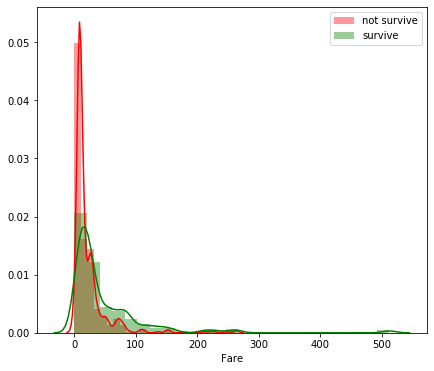

In [6]:
#Menganalisa umur vs survived(target),untuk melihat yang selamat itu umurnya seperti apasih
plt.figure(figsize=(7, 6))
sns.distplot(df.Fare[df.Survived == 0], bins=25, color="r", label="not survive") #disini kita melihat membandingkan umur dengan target, bins adalah jarak antar umur dari balita hingga lansia
sns.distplot(df.Fare[df.Survived == 1], bins=25, color="g", label="survive")
plt.legend();

### categoric / ordinal vs target

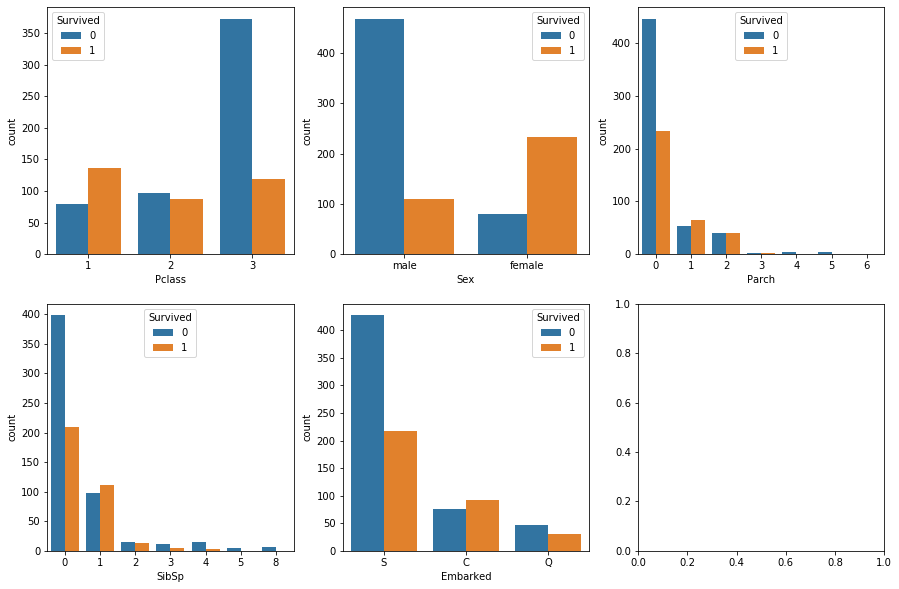

In [7]:
cat_var = ["Pclass", "Sex", "Parch", "SibSp", "Embarked"]

fig, axes = plt.subplots(2, 3, figsize=(15, 10))

for cat, ax in zip(cat_var, axes.flatten()):
    sns.countplot(cat, data=df, hue="Survived", ax=ax)

# Pandas Crosstab (Optional)

In [8]:
pd.crosstab(df.Pclass, df.Survived) #cara mudah dan cepat ya bisa pakai ini, crosstab dari pandas

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


In [9]:
pd.crosstab(df.Pclass, df.Survived, normalize="index") #kita bisa mendapatkan infomasi kalau yang survived itu cenderung ke kelas 1, kleas 3 cenderung mampos

Survived,0,1
Pclass,,
1,0.370370,0.629630
2,0.527174,0.472826
3,0.757637,0.242363


# Feature Engineering

### Adding feature => isAlone

In [10]:
df["isAlone"] = (df.SibSp == 0) & (df.Parch == 0) #melihat siapa yang benar benar sendri di kapal tanpa saudara dan ortu

In [11]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,isAlone
PassengerId,,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S,False
2,1,1,female,38.0,1,0,71.2833,C,False
3,1,3,female,26.0,0,0,7.9250,S,True
4,1,1,female,35.0,1,0,53.1000,S,False
5,0,3,male,35.0,0,0,8.0500,S,True


## Binning

In [12]:
df.Age = pd.cut(df.Age, [0, 5, 12, 18, 40, 120], labels=["balita", "anak-anak", "remaja", "dewasa", "lansia"])
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,isAlone
PassengerId,,,,,,,,,
1,0,3,male,dewasa,1,0,7.2500,S,False
2,1,1,female,dewasa,1,0,71.2833,C,False
3,1,3,female,dewasa,0,0,7.9250,S,True
4,1,1,female,dewasa,1,0,53.1000,S,False
5,0,3,male,dewasa,0,0,8.0500,S,True


### Fare

In [13]:
df.Fare = pd.cut(df.Fare, [0, 25, 100, 600], labels=["murah", "mahal", "eksekutif"])
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,isAlone
PassengerId,,,,,,,,,
1,0,3,male,dewasa,1,0,murah,S,False
2,1,1,female,dewasa,1,0,mahal,C,False
3,1,3,female,dewasa,0,0,murah,S,True
4,1,1,female,dewasa,1,0,mahal,S,False
5,0,3,male,dewasa,0,0,murah,S,True


# Dataset Splitting

In [21]:
X = df.drop(columns="Survived")  
y = df.Survived

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((712, 8), (179, 8), (712,), (179,))

# Preprocessor

In [22]:
from jcopml.pipeline import num_pipe, cat_pipe

In [27]:
preprocessor =  ColumnTransformer([
    ("numeric", num_pipe(scaling="minmax"), ["SibSp", "Parch"]),
        ("categoric", cat_pipe(encoder="onehot"), ["Pclass", "Sex", "Age", "Embarked", "Fare", "isAlone" ])
])
#kodingan menjadi lebih singkat karna memakai library jcopml

In [28]:
# numerical_pipeline = Pipeline([
#     ("imputer", SimpleImputer(strategy="mean")),
#     ("scaler", MinMaxScaler())
# ]) #pada numerikal pipa ini kita membuat imputer yaitu mengimpute data data yang kosang dengan isi rata-rata dan scalernya dengan minmax scaler

# categorical_pipeline = Pipeline([
#     ("imputer", SimpleImputer(strategy="most_frequent")),
#     ("onehot", OneHotEncoder())#pada kategorikal pipa ini kita membuat imputer yaitu mengimpute data data yang kosang dengan isi data yg frequency nya tinggi dan encode dengan one hot encoding
# ])

# preprocessor = ColumnTransformer([
#     ("numeric", numerical_pipeline, ["SibSp", "Parch", "Fare"]),
#     ("categoric", categorical_pipeline, ["Pclass", "Sex", "Embarked" ])
# ])

# Training

In [29]:
from jcopml.tuning import grid_search_params as gsp

In [32]:
pipeline = Pipeline([
    ("prep", preprocessor),
    ("algo", KNeighborsClassifier())
])

model = GridSearchCV(pipeline, gsp.knn_params, cv=3, n_jobs=-1, verbose=1) #cv atau cross validationnya 3 atau 5(basic),, njobs untuk memanfaatkan berapa core cpu kita, -1 artinya pakailah semua,, verbose untuk pas running ga kaya ngehang dan menampilkan report
model.fit(X_train, y_train)

#Evaluation
print(model.best_params_)
print(model.score(X_train, y_train),model.best_score_, model.score(X_test, y_test))

Fitting 3 folds for each of 90 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.6s


{'algo__n_neighbors': 25, 'algo__p': 2, 'algo__weights': 'distance'}
0.8792134831460674 0.8146237397912751 0.7988826815642458


[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:    2.6s finished


In [ ]:
# pipeline = Pipeline([
#     ("preprocessor", preprocessor),
#     ("algoritma", KNeighborsClassifier())
# ])

# parameter = {
#     "algoritma__n_neighbors": range(1, 51, 2),
#     "algoritma__weights": ["uniform", "distance"],
#     "algoritma__p": [1, 2]
# }

# model = GridSearchCV(pipeline, parameter, cv=3, n_jobs=-1, verbose=1) #cv atau cross validationnya 3 atau 5(basic),, njobs untuk memanfaatkan berapa core cpu kita, -1 artinya pakailah semua,, verbose untuk pas running ga kaya ngehang dan menampilkan report
# model.fit(X_train, y_train)

# print(model.best_params_)
# print(model.score(X_train, y_train),model.best_score_, model.score(X_test, y_test))